In [ ]:
pip install google-cloud-bigquery
pip install google-cloud-bigquery google-cloud-bigquery-storage pyarrow tqdm
pip install --upgrade jupyter ipywidgets

In [ ]:
pip install google-cloud-bigquery

In [ ]:
pip install google-cloud-bigquery google-cloud-bigquery-storage pyarrow tqdm

In [ ]:
pip install --upgrade jupyter ipywidgets

In [19]:
import matplotlib.pyplot as plt

In [3]:
import os
from google.cloud import bigquery

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'ccbd-exam-2024-asad-aslam-279ee9138000.json'

client = bigquery.Client()

In [5]:
average_income_each_occupation = """
SELECT 
  Occupation_type, 
  AVG(Total_income) AS Avg_Total_Income
FROM 
   `ccbd-exam-2024-asad-aslam.credit_card_dataset.credit_card`
GROUP BY 
  Occupation_type
ORDER BY 
  Avg_Total_Income DESC;

"""

average_income_each_occupation_query = client.query(average_income_each_occupation)
results = average_income_each_occupation_query.to_dataframe()
results

,Occupation_type,Avg_Total_Income
0,Managers,276028.216113
1,IT staff,216450.000000
2,Realty agents,211781.250000
3,Accountants,203420.175000
4,Drivers,202070.947030
5,HR staff,195954.545455
6,Private service staff,194703.488372
7,High skill tech staff,191292.857143
8,Core staff,186171.100912
9,Laborers,175121.183005


In [6]:
# Load the bigquery magic
%load_ext google.cloud.bigquery

In [ ]:
%%bigquery average_income_each_occupation
SELECT 
  Occupation_type, 
  AVG(Total_income) AS Avg_Total_Income
FROM 
   `ccbd-exam-2024-asad-aslam.credit_card_dataset.credit_card`
GROUP BY 
  Occupation_type
ORDER BY 
  Avg_Total_Income DESC;


In [10]:
average_income_each_occupation

,Occupation_type,Avg_Total_Income
0,Managers,276028.216113
1,IT staff,216450.000000
2,Realty agents,211781.250000
3,Accountants,203420.175000
4,Drivers,202070.947030
5,HR staff,195954.545455
6,Private service staff,194703.488372
7,High skill tech staff,191292.857143
8,Core staff,186171.100912
9,Laborers,175121.183005


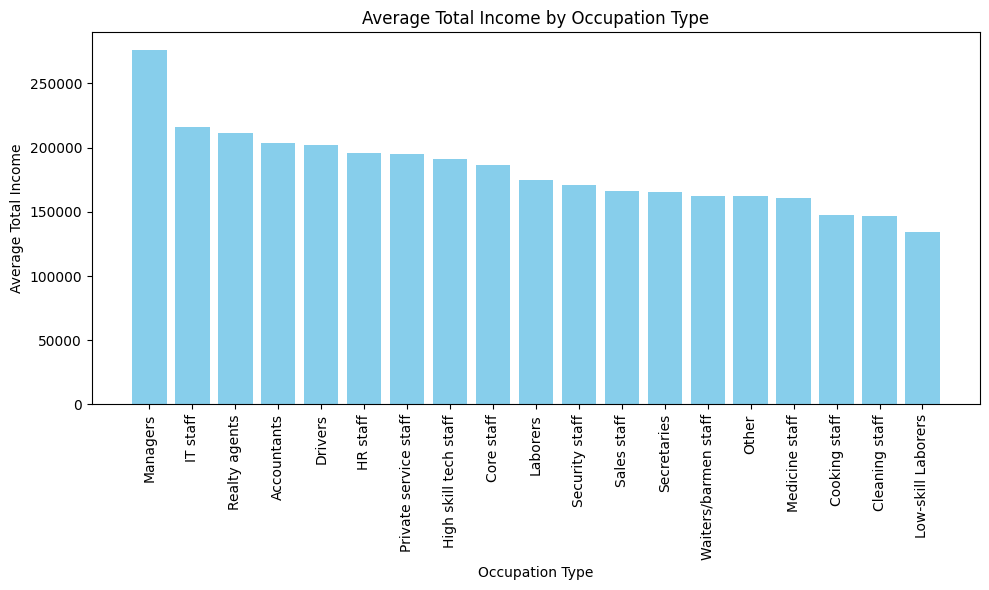

In [20]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))
plt.bar(average_income_each_occupation['Occupation_type'], 
        average_income_each_occupation['Avg_Total_Income'], 
        color='skyblue')

# Add labels and title
plt.xlabel('Occupation Type')
plt.ylabel('Average Total Income')
plt.title('Average Total Income by Occupation Type')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
%%bigquery education_type_with_number_of_people_unemployed 
SELECT 
  Education_type, 
  COUNT(*) AS Num_Unemployed
FROM 
  `ccbd-exam-2024-asad-aslam.credit_card_dataset.credit_card`
WHERE 
  Unemployed = 1
GROUP BY 
  Education_type
ORDER BY 
  Num_Unemployed DESC;

In [12]:
education_type_with_number_of_people_unemployed

,Education_type,Num_Unemployed
0,Secondary / secondary special,1366
1,Higher education,267
2,Lower secondary,47
3,Incomplete higher,15
4,Academic degree,1


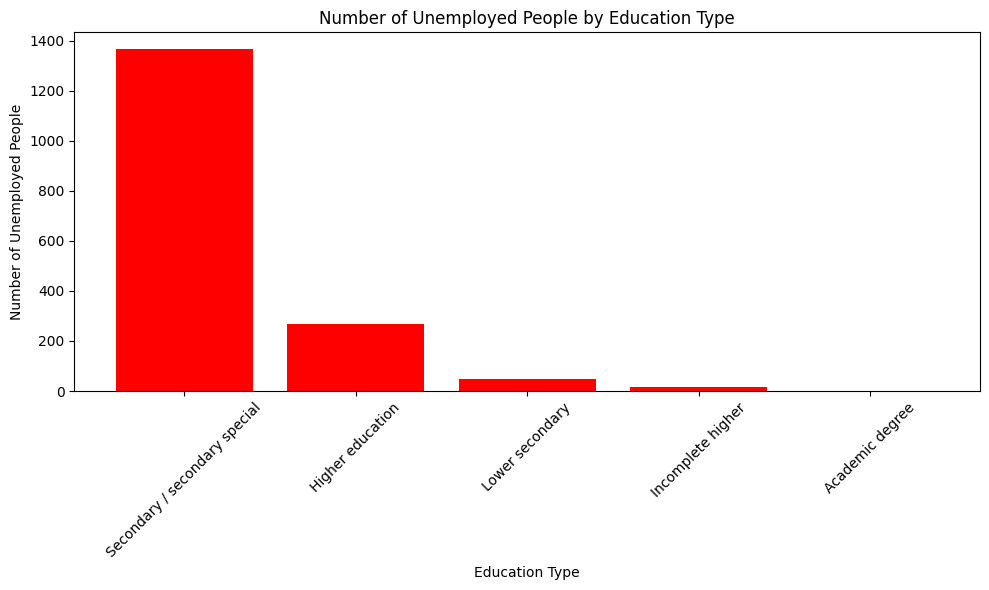

In [23]:
# Extract data for plotting
labels = education_type_with_number_of_people_unemployed['Education_type']
sizes = education_type_with_number_of_people_unemployed['Num_Unemployed']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color='red')

# Add title and labels
plt.xlabel('Education Type')
plt.ylabel('Number of Unemployed People')
plt.title('Number of Unemployed People by Education Type')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
%%bigquery num_of_People_own_car_and_income_greater_than_50000
SELECT 
  COUNT(*) AS Num_People
FROM 
  `ccbd-exam-2024-asad-aslam.credit_card_dataset.credit_card`
WHERE 
  Own_car = 1 AND 
  Total_income > 50000;

In [14]:
num_of_People_own_car_and_income_greater_than_50000

,Num_People
0,3557


In [ ]:
%%bigquery housing_type_with_Avg_number_of_Family
SELECT 
  Housing_type, 
  AVG(Num_family) AS Avg_Num_Family
FROM 
  `ccbd-exam-2024-asad-aslam.credit_card_dataset.credit_card`
GROUP BY 
  Housing_type
ORDER BY 
  Avg_Num_Family DESC;

In [16]:
housing_type_with_Avg_number_of_Family

,Housing_type,Avg_Num_Family
0,Co-op apartment,2.382353
1,Office apartment,2.315789
2,House / apartment,2.189083
3,With parents,2.149554
4,Municipal apartment,2.092879
5,Rented apartment,1.979167


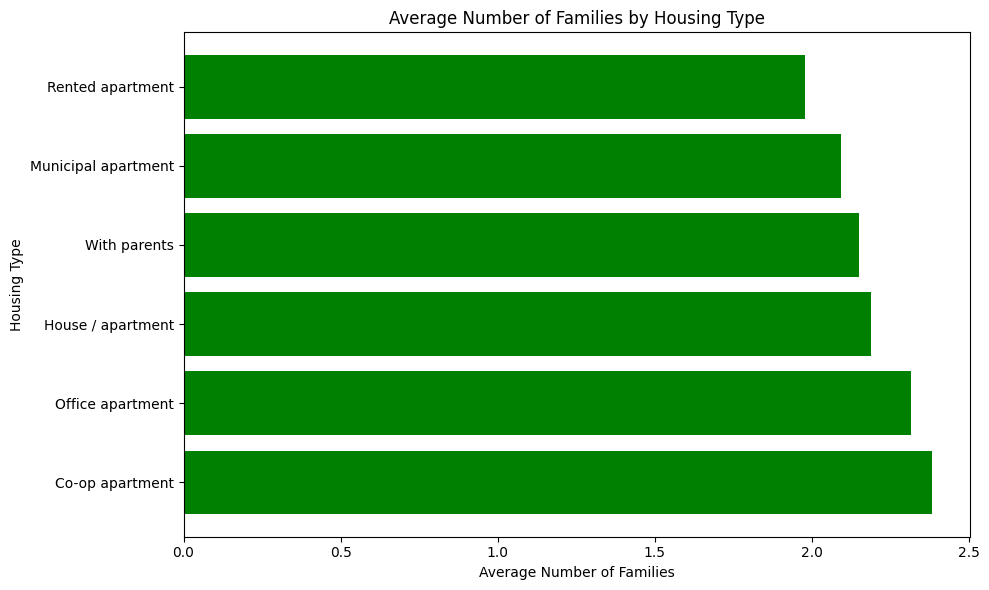

In [25]:
# Extract data for plotting
housing_types = housing_type_with_Avg_number_of_Family['Housing_type']
avg_num_families = housing_type_with_Avg_number_of_Family['Avg_Num_Family']

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(housing_types, avg_num_families, color='green')

# Add title and labels
plt.xlabel('Average Number of Families')
plt.ylabel('Housing Type')
plt.title('Average Number of Families by Housing Type')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
%%bigquery correlation_between_years_employed_and_total_income
SELECT 
  CORR(Years_employed, Total_income) AS Correlation
FROM 
  `ccbd-exam-2024-asad-aslam.credit_card_dataset.credit_card`;


In [18]:
correlation_between_years_employed_and_total_income

,Correlation
0,0.087641
